In [1]:
#Imports
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
import scipy.optimize as opt

In [2]:
#Funcion que carga los datos
def load_csv(filename):
    valores = read_csv (filename, header=None).to_numpy()
    return valores.astype(float)

# 1. Regresión Logística

Los datos del fichero ex2data1.csv representan las notas obtenidas por una seria de candidatos en los dos exámenes de admisión de una universidad junto con la información sobre si fueron (1) o no (0) admitidos.
El objetivo es construir un modelo por regresión logística que estime la probabilidad de que un estudiante sea admitido en esa universidad en base a las notas de sus exámenes.

## 1.1 Visualización de los datos

In [3]:
#data = load_csv('ex2data1.csv')

#Obtencion de todas las columnas de la tabla menos la ultima columna
#X = data[:, :-1]
#np.shape(X)
#Obtencion de la ultima columna de la tabla
#Y = data[:, -1]
#np.shape(Y)


In [4]:
# Obtiene un vector con los indices de los ejemplos positivos
#pos = np.where(Y == 1)
# Obtiene un vector con los indices de los ejemplos positivos
#pos2 = np.where(Y == 0)

# Dibujo de los ejemplos positivos
#plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k')
# Dibujo de los ejemplos positivos
#plt.scatter(X[pos2, 0], X[pos2, 1], marker='.', c='r')

## 1.2 Funcion Sigmoide

In [5]:
def sigmoid_funct(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def cost_funct(Theta, X, Y):
    #g(X*Theta)
    g = sigmoid_funct(np.matmul(X, Theta))
    #g = sigmoid_funct(X * Theta)
    m = np.shape(X)[0]
    J = (np.transpose(np.log(g)) * Y) + (np.transpose(np.log(1-g)) * (1 - Y))
    return np.sum(-J)/m

In [7]:
def gradient(Theta, X, Y):
    m = np.shape(X)[0]
    g = sigmoid_funct(np.matmul(X,Theta))
    J = np.matmul(np.transpose(X), (g - Y))
    return J/m

In [8]:
def pinta_frontera_recta(X, Y, Theta):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
    x2_min, x2_max = X[:, 2].min(), X[:, 2].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

    h = sigmoid_funct(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(Theta))
    h = h.reshape(xx1.shape)

    # el cuarto parámetro es el valor de z cuya frontera se
    # quiere pintar    
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    plt.savefig("fronteir.png")
    plt.show
    aux(fig, ax)
    #plt.close()

In [9]:
def pass_or_fail(x):
    return 1 if x >= 0.5 else 0

In [10]:
def porcentaje_aciertos(Theta, X, Y):
    # Calculamos los valores estimados segun la theta que hemos obtenido
    sig = sigmoid_funct(np.matmul(X, Theta))

    # Comparamos si nuestra estimación es correcta en comparacion con las Y
    # y devolvemos el numero de ejemplos estimados correctamente
    # if(sig >= 0.5) -> devuelve 1 y si no devuelve 0
    # lo comparamos con la y de los casos de entrenamiento y si corresponde
    # lo hemos calculado bien
    ev_correct = np.sum((sig >= 0.5) == Y)
    
    # Devolvemos el porcentaje
    return ev_correct/len(sig) * 100

In [11]:
def aux(fig, ax):
    
    data = load_csv('ex2data1.csv')
    #Obtencion de todas las columnas de la tabla menos la ultima columna
    X = data[:, :-1]
    np.shape(X)
    #Obtencion de la ultima columna de la tabla
    Y = data[:, -1]
    np.shape(Y)
    # Obtiene un vector con los indices de los ejemplos positivos
    pos = np.where(Y == 1)
    # Obtiene un vector con los indices de los ejemplos positivos
    pos2 = np.where(Y == 0)

    # Dibujo de los ejemplos positivos
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k', label = "Admitted")
    # Dibujo de los ejemplos positivos
    plt.scatter(X[pos2, 0], X[pos2, 1], marker='.', c='r', label = "Not Admitted")
    
    # Anadimos leyenda a la grafica y la posicionamos bien
    plt.legend(loc = 'upper right')

    # Anadimos el texto a los ejes (como en la grafica que aparece de ejemplo)
    ax.set_xlabel('Exam1 Score', fontsize=10)
    ax.set_ylabel('Exam2 Score', fontsize=10)

In [12]:
def logistic_regresion():
    data = load_csv('ex2data1.csv')
    #Obtencion de todas las columnas de la tabla menos la ultima columna
    X = data[:, :-1]
    m = np.shape(X)[0]
    # Aregamos una columna de 1s
    X = np.hstack([np.ones([m, 1]), X])
    n = np.shape(X)[1]
    #Obtencion de la ultima columna de la tabla
    Y = data[:, -1]
    
    Theta = np.zeros(n)
    
    result = opt.fmin_tnc(func=cost_funct, x0=Theta, fprime=gradient, args=(X,Y), messages=0)
    theta_opt = result[0]
    
    print("theta optimizada:", theta_opt)
    pinta_frontera_recta(X, Y, theta_opt)
    #aux()
    porcentaje =  porcentaje_aciertos(theta_opt, X, Y)
    print(porcentaje)
    

theta optimizada: [-25.16131867   0.20623159   0.20147149]
89.0


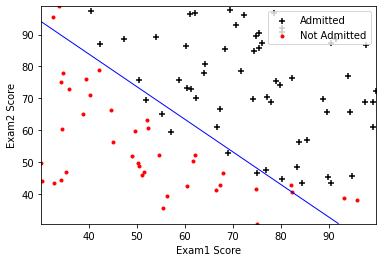

In [13]:
logistic_regresion()

In [14]:
n = np.shape(X)[1]
Theta = np.zeros(n)
a = cost_funct(X, Y, Theta)
print(a)
b = gradient(X, Y, Theta)
print(b)

NameError: name 'X' is not defined

In [ ]:
1 / (1 + np.exp(-34.62365962))